In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def write_answer(task_idx, answer):
    with open('task' + str(task_idx) + '.txt', 'w') as f:
        f.write(str(answer))

In [4]:
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [5]:
X = digits.data
y = digits.target

### Task 1. Decision Tree Classifier 

In [21]:
dts_cv_score = np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, n_jobs=-1))

In [22]:
print('DTC CV Score: {}'.format(dts_cv_score))

DTC CV Score: 0.8347047023431546


In [23]:
write_answer(1, dts_cv_score)

### Task 2. Bagging Classifier (default parameters)

In [24]:
bagging_cv_score = np.mean(cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                             n_estimators=100), 
                                           X, y, cv=10, n_jobs=-1))

In [25]:
print('Bagging CV Score: {}'.format(bagging_cv_score))

Bagging CV Score: 0.9226160403373639


In [26]:
write_answer(2, bagging_cv_score)

### Task 3. Bagging Classifier (feature subspace) 

In [27]:
d = X.shape[1]
X.shape, np.sqrt(d)

((1797, 64), 8.0)

In [28]:
mod_bagging_cv_score = np.mean(cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                                 n_estimators=100, 
                                                                 max_features=int(np.sqrt(d))),
                                              X, y, cv=10, n_jobs=-1))

In [29]:
print('Bagging with feature subspacing (for each tree) CV Score: {}'.format(mod_bagging_cv_score))

Bagging with feature subspacing (for each tree) CV Score: 0.9288857284618729


In [30]:
write_answer(3, mod_bagging_cv_score)

### Task 4. Decision Tree Classifier (feature subspace) 

In [16]:
mod_dts_cv_score = np.mean(
    cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features=int(np.sqrt(d))),
                                                                 n_estimators=100),
                                              X, y, cv=10, n_jobs=-1)
)

In [17]:
print('Bagging with feature subspacing (for each node) CV Score: {}'.format(mod_dts_cv_score))

Bagging with feature subspacing (for each node) CV Score: 0.9527921446297878


In [18]:
write_answer(4, mod_dts_cv_score)

### Task 5. Bagging with FS and RF comparision

In [19]:
rf_cv_score = np.mean(cross_val_score(RandomForestClassifier(n_estimators=100),
                                              X, y, cv=10, n_jobs=-1))

In [20]:
print('Random forest CV Score: {}'.format(mod_dts_cv_score))

Random forest CV Score: 0.9527921446297878


In [21]:
answers = []

#### Будем проверять следующие утверждения: 

##### 1. Случайный лес сильно переобучается с ростом количества деревьев 

In [22]:
n_estimators_arr = np.linspace(10, 500, 20).astype('int')
scores = [np.mean(cross_val_score(RandomForestClassifier(n_estimators=i), X, y, cv=10, n_jobs=-1)) for i in n_estimators_arr]

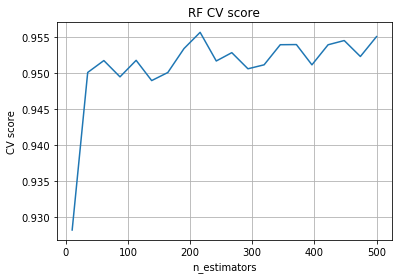

In [23]:
pylab.plot(n_estimators_arr, scores)
pylab.title('RF CV score')
pylab.xlabel('n_estimators')
pylab.ylabel('CV score')
pylab.grid()

Отсюда можно сделать вывод, что алгоритм не переобучается при рости количества деревьев, а выходит на некоторое плато - сходится к определенному значению. Ответ - **нет**

##### 2. При очень маленьком числе деревьев (5, 10, 15) случаный лес работает хуже, чем при большом количестве деревьев

Это действительно так, поскольку при росте количества деревьев разброс уменьшается линейно, что положительно сказывается на качестве работы алгоритма. Также это видно из графика выше. Ответ - **да**

In [24]:
answers.append(2)

##### 3. С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества, а затем качество существенно не меняется 

Ответ - **да**. Это хорошо видно на графике

In [25]:
answers.append(3)

##### 4. При большом количестве признаков (для данного датасета 40, 50) качество классификации становится хуже, чем при малом количестве признаком (5, 10). Это связано с тем, что чем меньше признаком выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениями в обучающей выборке), и тем лучше работает их композиция. 

In [26]:
n_features = np.linspace(5, 60, 11).astype('int')
scores = [np.mean(cross_val_score(RandomForestClassifier(max_features=i), X, y, cv=10, n_jobs=-1)) for i in n_features]

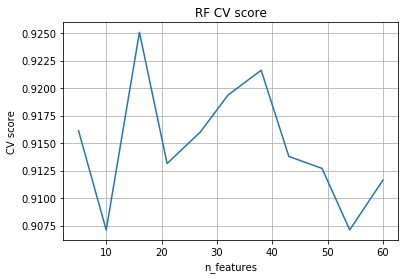

In [27]:
pylab.plot(n_features, scores)
pylab.title('RF CV score')
pylab.xlabel('n_features')
pylab.ylabel('CV score')
pylab.grid()

Все выше написанное верно, это также видно из графика. Ответ - **да**

In [ ]:
answers.append(4)

##### 5. При большом количестве признаком (40, 50, 60) качество классификации лучше, чем при малом количестве признаком (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно. 

Ответ - **нет**, выше мы убедились в обратном.

##### 6. При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, тк деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается 

In [ ]:
max_depths = np.linspace(5, 25, 20).astype('int')
scores = [np.mean(cross_val_score(RandomForestClassifier(max_depth=i), X, y, cv=10, n_jobs=-1)) for i in max_depths]

In [ ]:
pylab.plot(max_depths, scores)
pylab.title('RF CV score')
pylab.xlabel('n_features')
pylab.ylabel('CV score')
pylab.grid()

Это утверждение заведомо ложное, поскольку в ансамбле деревьев нам удобно иметь много переобученных деревьев. Переобученность (большая глубина) гарантирует малое смещение, а их количество - низкий разброс. Ответ - **нет**

##### 7. При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья переобучены по-разному, и при усреднении они компенсируют переобученность друг-друга) 

Ответ - **да**

In [ ]:
answers.append(7)

In [ ]:
answers = ' '.join(np.array(answers).astype('str'))
print(answers)

In [ ]:
write_answer(5, answers)